# Update of fragmentation scalar to use HLM temperature and moisture scalars

- Issue: https://github.com/NGEET/fates/issues/699
- Pull request: https://github.com/NGEET/fates/pull/705

## Import libraries

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

## Load history output data

In [2]:
filename_history_frag = 'data/frag-retest-10year-test.nc' # Test data
filename_history_base = 'data/frag-retest-10year-base.nc' # Baseline data
data_frag = xr.open_dataset(filename_history_frag)
data_base = xr.open_dataset(filename_history_base)

FileNotFoundError: [Errno 2] No such file or directory: b'/home/gregorylemieux/Work/Repos/Analysis/fates-jupyter/fragmentation/data/frag-retest-10year-test.nc'

## Select data subsets

Above ground coarse woody debris

In [3]:
litter_cwd_ag_frag = data_frag.LITTER_CWD_AG_ELEM.sel(fates_levelem=0)
litter_cwd_ag_base = data_base.LITTER_CWD_AG_ELEM.sel(fates_levelem=0)
litter_cwd_ag_diff = litter_cwd_ag_frag - litter_cwd_ag_base

Below ground coarse woody debris

In [4]:
litter_cwd_bg_frag = data_frag.LITTER_CWD_BG_ELEM.sel(fates_levelem=0)
litter_cwd_bg_base = data_base.LITTER_CWD_BG_ELEM.sel(fates_levelem=0)
litter_cwd_bg_diff = litter_cwd_bg_frag - litter_cwd_bg_base

Above ground fines (leaf)

In [5]:
litter_fines_ag_frag = data_frag.LITTER_FINES_AG_ELEM.sel(fates_levelem=0)
litter_fines_ag_base = data_base.LITTER_FINES_AG_ELEM.sel(fates_levelem=0)
litter_fines_ag_diff = litter_fines_ag_frag - litter_fines_ag_base

Below ground fines (root)

In [6]:
litter_fines_bg_frag = data_frag.LITTER_FINES_BG_ELEM.sel(fates_levelem=0)
litter_fines_bg_base = data_base.LITTER_FINES_BG_ELEM.sel(fates_levelem=0)
litter_fines_bg_diff = litter_fines_bg_frag - litter_fines_bg_base

Fuel intensity

In [7]:
fuel_intensity_frag = data_frag.FIRE_INTENSITY
fuel_intensity_base = data_base.FIRE_INTENSITY
fuel_intensity_diff = fuel_intensity_frag - fuel_intensity_base

Fuel surface/volume

In [8]:
fuel_sav_frag = data_frag.FIRE_FUEL_SAV
fuel_sav_base = data_base.FIRE_FUEL_SAV
fuel_sav_diff = fuel_sav_frag - fuel_sav_base

Effective Fuel moisture

In [9]:
fuel_eff_moist_frag = data_frag.FIRE_FUEL_EFF_MOIST
fuel_eff_moist_base = data_base.FIRE_FUEL_EFF_MOIST
fuel_eff_moist_diff = fuel_eff_moist_frag - fuel_eff_moist_base

Fuel bulk density

In [10]:
fuel_bulkd_frag = data_frag.FIRE_FUEL_BULKD
fuel_bulkd_base = data_base.FIRE_FUEL_BULKD
fuel_bulkd_diff = fuel_bulkd_frag - fuel_bulkd_base

Fuel moisture (MEF)

In [11]:
fuel_mef_frag = data_frag.FIRE_FUEL_MEF
fuel_mef_base = data_base.FIRE_FUEL_MEF
fuel_mef_diff = fuel_mef_frag - fuel_mef_base

Ground fuel within each patch age bin

In [12]:
# divide this by patch_area_by_age to get fuel per?
sum_fuel_pa_frag = data_frag.SUM_FUEL_BY_PATCH_AGE
sum_fuel_pa_base = data_base.SUM_FUEL_BY_PATCH_AGE
sum_fuel_pa_diff = sum_fuel_pa_frag - sum_fuel_pa_base

Total ground fuel

In [13]:
sum_fuel_frag = data_frag.SUM_FUEL
sum_fuel_base = data_base.SUM_FUEL
sum_fuel_diff = sum_fuel_frag - sum_fuel_base

Corrected fire intensity

In [14]:
fire_intensity_corr_frag = data_frag.FIRE_INTENSITY_AREA_PRODUCT / data_frag.FIRE_AREA
fire_intensity_corr_base = data_base.FIRE_INTENSITY_AREA_PRODUCT / data_base.FIRE_AREA
fire_intensity_corr_diff = fire_intensity_corr_frag - fire_intensity_corr_base

Fuel moisture (size-resolved)

In [15]:
fuel_moist_frag = data_frag.FUEL_MOISTURE_NFSC
fuel_moist_base = data_base.FUEL_MOISTURE_NFSC
fuel_moist_diff = fuel_moist_frag - fuel_moist_base

## Plot the data

### Global plots

Above ground coarse woody debris

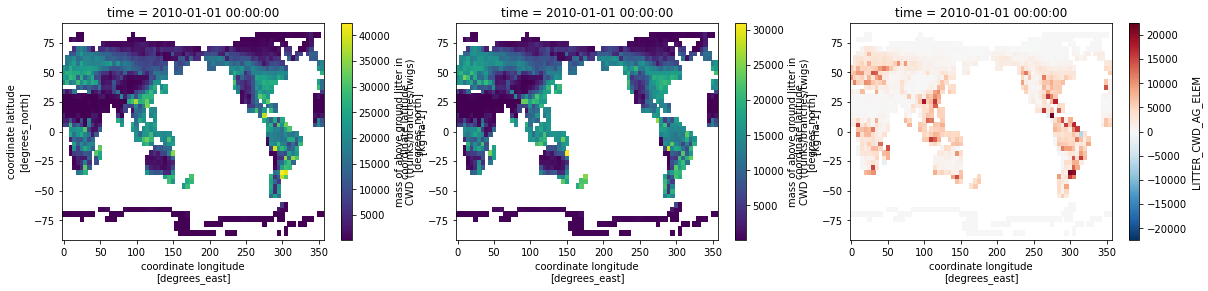

In [16]:
tstop_idx = 119
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
litter_cwd_ag_frag.isel(time=tstop_idx).plot(ax=ax1)
litter_cwd_ag_base.isel(time=tstop_idx).plot(ax=ax2)
litter_cwd_ag_diff.isel(time=tstop_idx).plot(ax=ax3)

Below ground coarse woody debris

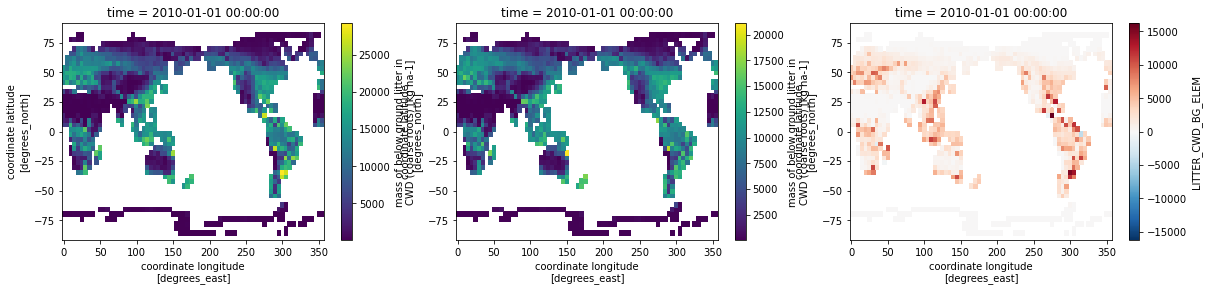

In [17]:
tstop_idx = 119
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
litter_cwd_bg_frag.isel(time=tstop_idx).plot(ax=ax1)
litter_cwd_bg_base.isel(time=tstop_idx).plot(ax=ax2)
litter_cwd_bg_diff.isel(time=tstop_idx).plot(ax=ax3)

Above ground fines (leaf)

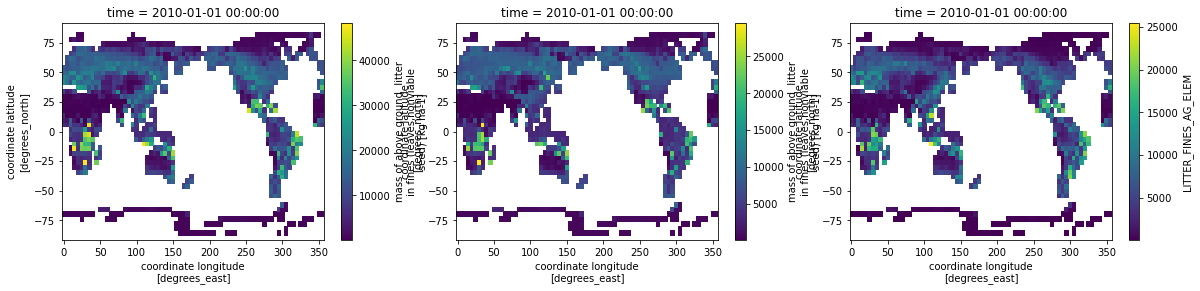

In [18]:
tstop_idx = 119
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
litter_fines_ag_frag.isel(time=tstop_idx).plot(ax=ax1)
litter_fines_ag_base.isel(time=tstop_idx).plot(ax=ax2)
litter_fines_ag_diff.isel(time=tstop_idx).plot(ax=ax3)

Below ground fines (root)

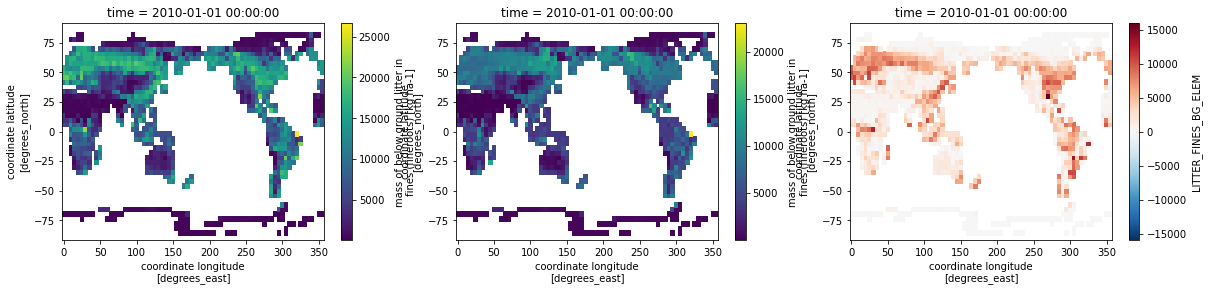

In [19]:
tstop_idx = 119
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
litter_fines_bg_frag.isel(time=tstop_idx).plot(ax=ax1)
litter_fines_bg_base.isel(time=tstop_idx).plot(ax=ax2)
litter_fines_bg_diff.isel(time=tstop_idx).plot(ax=ax3)

Fuel intensity

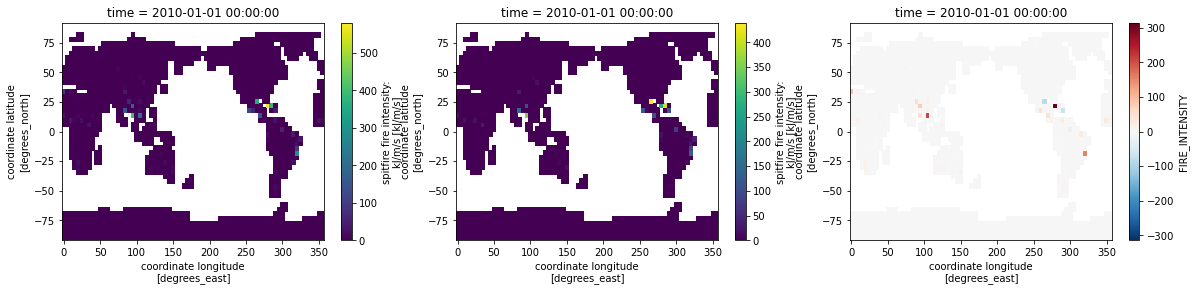

In [20]:
tstop_idx = 119
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
fuel_intensity_frag.isel(time=tstop_idx).plot(ax=ax1)
fuel_intensity_base.isel(time=tstop_idx).plot(ax=ax2)
fuel_intensity_diff.isel(time=tstop_idx).plot(ax=ax3)

Fuel surface/volume

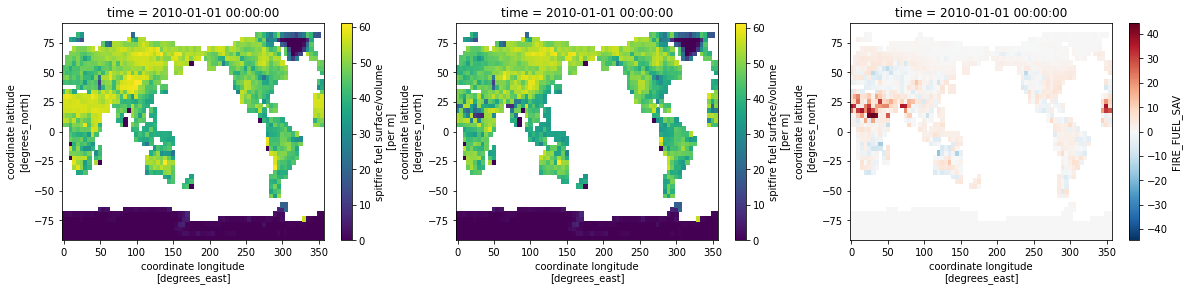

In [21]:
tstop_idx = 119
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
fuel_sav_frag.isel(time=tstop_idx).plot(ax=ax1)
fuel_sav_base.isel(time=tstop_idx).plot(ax=ax2)
fuel_sav_diff.isel(time=tstop_idx).plot(ax=ax3)

Effective Fuel moisture

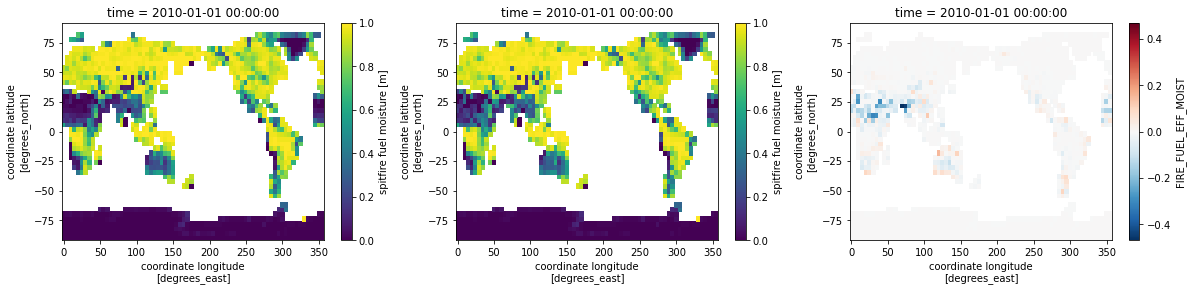

In [22]:
tstop_idx = 119
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
fuel_eff_moist_frag.isel(time=tstop_idx).plot(ax=ax1)
fuel_eff_moist_base.isel(time=tstop_idx).plot(ax=ax2)
fuel_eff_moist_diff.isel(time=tstop_idx).plot(ax=ax3)

Fuel bulk density

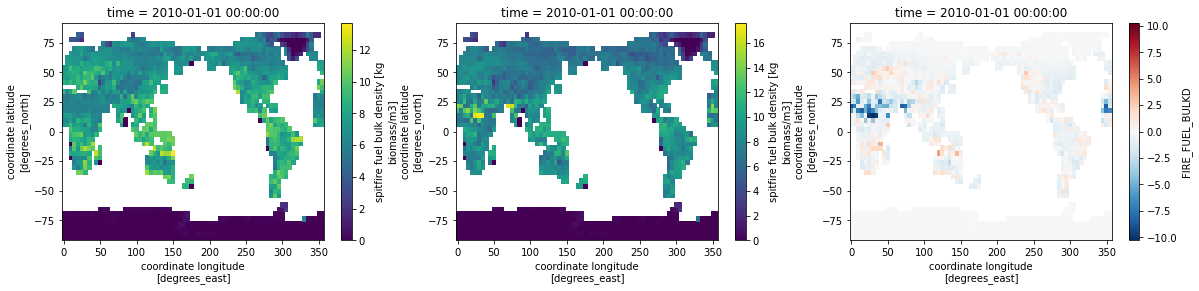

In [23]:
tstop_idx = 119
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
fuel_bulkd_frag.isel(time=tstop_idx).plot(ax=ax1)
fuel_bulkd_base.isel(time=tstop_idx).plot(ax=ax2)
fuel_bulkd_diff.isel(time=tstop_idx).plot(ax=ax3)

Fuel moisture (MEF)

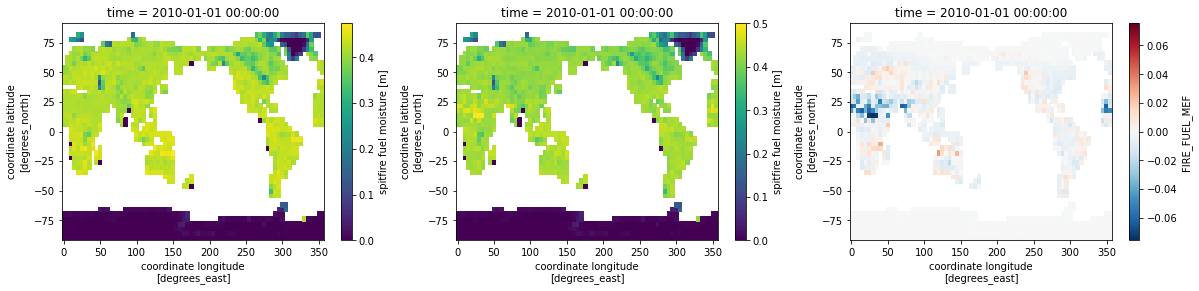

In [62]:
tstop_idx = 119
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
fuel_mef_frag.isel(time=tstop_idx).plot(ax=ax1)
fuel_mef_base.isel(time=tstop_idx).plot(ax=ax2)
fuel_mef_diff.isel(time=tstop_idx).plot(ax=ax3)

Ground fuel within each patch age bin

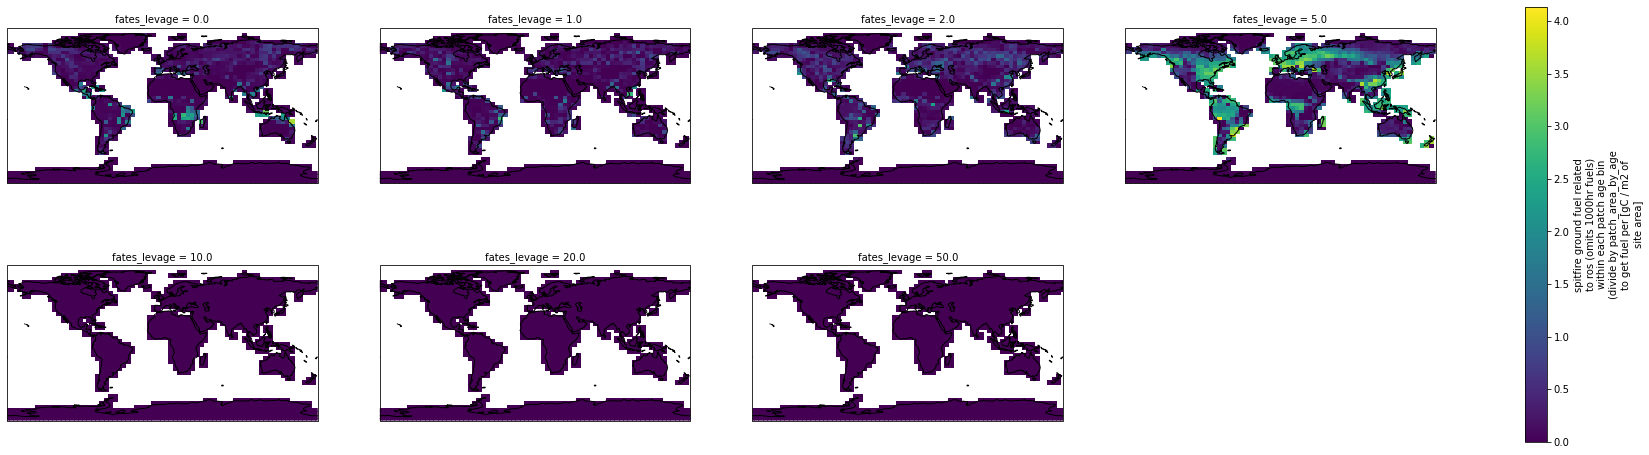

In [98]:
tstop_idx = 119
fg = sum_fuel_pa_frag.isel(time=tstop_idx).plot(transform=ccrs.PlateCarree(),
                            col='fates_levage', col_wrap = 4, figsize=(32,8),
                            subplot_kws={'projection': ccrs.PlateCarree()})
for ax in fg.axes.flat:
    ax.coastlines()

Ground fuel within each patch age bin (diffs)

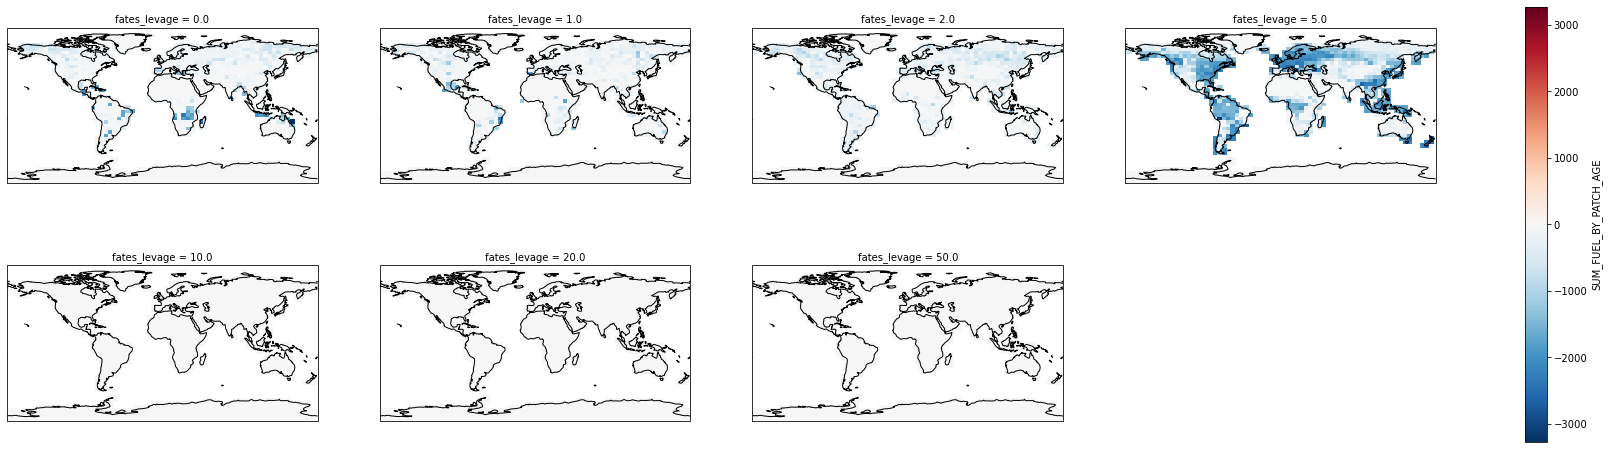

In [89]:
tstop_idx = 119
fg = sum_fuel_pa_diff.isel(time=tstop_idx).plot(transform=ccrs.PlateCarree(),
                            col='fates_levage', col_wrap = 4, figsize = (32,8),
                            subplot_kws={'projection': ccrs.PlateCarree()})
for ax in fg.axes.flat:
    ax.coastlines()

Total ground fuel

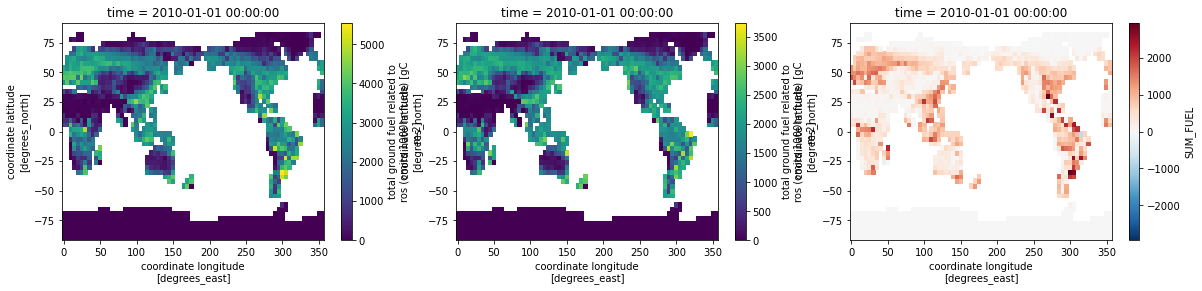

In [26]:
tstop_idx = 119
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
sum_fuel_frag.isel(time=tstop_idx).plot(ax=ax1)
sum_fuel_base.isel(time=tstop_idx).plot(ax=ax2)
sum_fuel_diff.isel(time=tstop_idx).plot(ax=ax3)

Corrected fire intensity

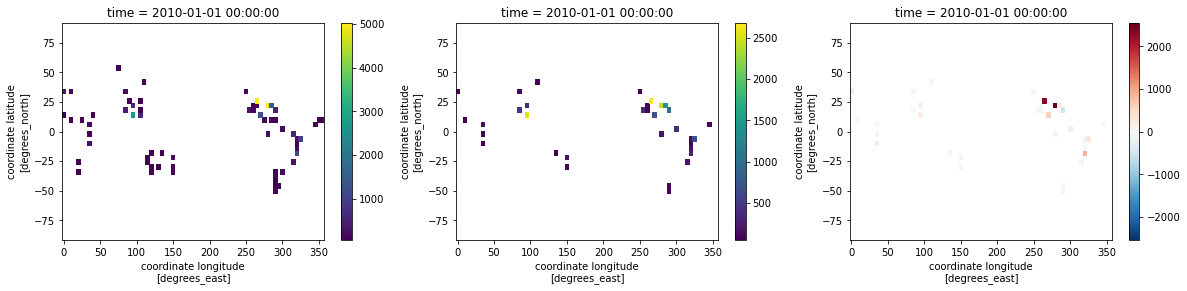

In [34]:
tstop_idx = 119
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
fire_intensity_corr_frag.isel(time=tstop_idx).plot(ax=ax1)
fire_intensity_corr_base.isel(time=tstop_idx).plot(ax=ax2)
fire_intensity_corr_diff.isel(time=tstop_idx).plot(ax=ax3)

Fuel moisture

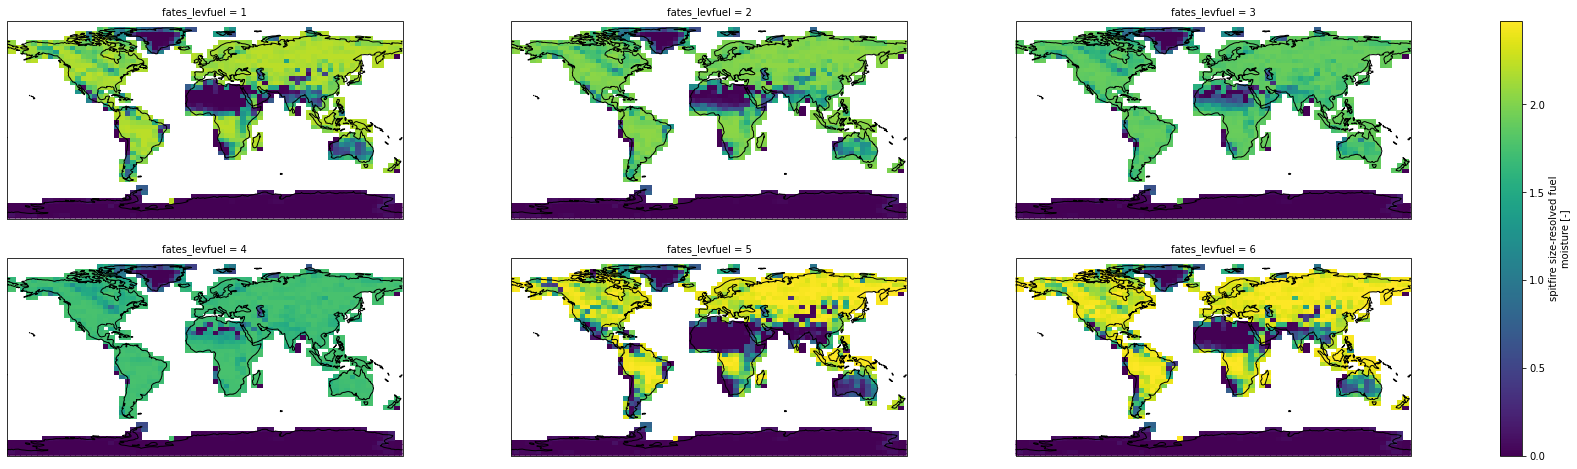

In [80]:
tstop_idx = 119
fg = fuel_moist_frag.isel(time=tstop_idx).plot(transform=ccrs.PlateCarree(),
                            col='fates_levfuel', col_wrap = 3, figsize = (32,8),
                            subplot_kws={'projection': ccrs.PlateCarree()})
for ax in fg.axes.flat:
    ax.coastlines()

Fuel moisture (diff)

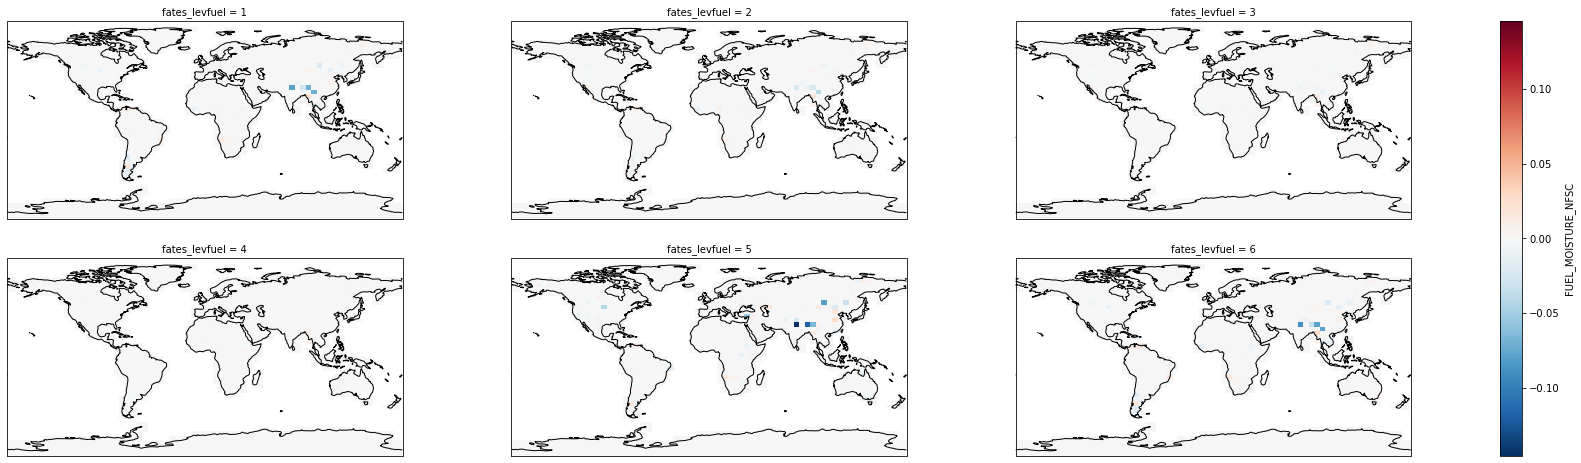

In [77]:
tstop_idx = 119
fg = fuel_moist_diff.isel(time=tstop_idx).plot(transform=ccrs.PlateCarree(),
                            col='fates_levfuel', col_wrap = 3, figsize = (32,8),
                            subplot_kws={'projection': ccrs.PlateCarree()})
for ax in fg.axes.flat:
    ax.coastlines()
#     ax.gridlines(draw_labels=True)